In [1]:
import numpy as np   # Importo paquete de álgebra lineal
import matplotlib.pyplot as plt   # Importo paquete de gráficos
import math   # Importo paquete de funciones matemáticas
import random   # Importo paquete para generar números pseudoaleatorios
import copy

## Punto 2

Se tiene una barra delgada de aluminio, originalmente a $T= 0\:°C$, cuyos extremos se someten repentinamente a temperaturas fijas. El extremo izquierdo se mantiene a una temperatura constante de $T_a = 100\:°C$ y el derecho a $T_b = 50\:°C$. Utilice los métodos explícito e implícito (Crank-Nicolson) de diferencias finitas para calcular la evolución de la distribución de temperaturas en función del tiempo. Tome que la barra tiene $L = 10\:cm$ de longitud y $k\:=\:0,835\:cm^2/s$ (conductividad térmica del aluminio). Haga los cálculos para $Δx\:=\:2\:cm$ y $Δt\:=\:0,1\:s$. Repítalos para $Δt\:=\:5\:s$ y compare sus resultados. Analice el comportamiento de la solución para los distintos regímenes.

In [2]:
# Defino la longitud "L" de la barra.
L = 10   # cm

# Defino la conductividad térmica del aluminio.
k = 0.835   # cm^2/s

In [3]:
# Divido la barra en "N" puntos, quedando "N-1" subintervalos de longitud "dx".
N = 6
dx = L/(N-1)   # Con "N=6" queda "dx=2" como dice el enunciado del problema

# Defino el incremento de tiempo "dt".
dt = 0.1   # s

### Método explícito

Debe resolverse la ecuación diferencial:

$$
k \frac{\partial^2 T_{(x,t)}}{\partial x^2} = \frac{\partial T_{(x,t)}}{\partial t}
$$

Discretizo el tiempo con $l$ y discretizo el eje x con $k$. Expreso $T(x_i,t_l) = T^l_i$ y discretizo  las derivadas parciales como cocientes incrementales:

$$
\frac{\partial^2 T}{\partial x^2} = \frac{T^l_{k+1}-2\:T^l_k+T^l_{k-1}}{\Delta x^2}
\hspace{1 cm} ; \hspace{1 cm}
\frac{\partial T}{\partial t} = \frac{T^{l+1}_k-T^l_k}{\Delta t}
$$

Reemplazando en la ecuación y definiendo $\lambda = k Δt / (Δx)^2$, se llega a:

$$
T^{l+1}_k = T^l_k + \lambda \left(T^l_{k+1}-2\:T^l_k+T^l_{k-1}\right) = \left(\lambda\right) T^l_{k-1} + \left(1 - 2 \lambda\right) T^l_k + \left(\lambda\right) T^l_{k+1}
$$

Es decir, con las temperaturas en $t$, calculo las temperaturas en $t+Δt$.

In [4]:
# Defino lambda.
lam = k*dt/(dx**2)

In [5]:
# Defino matriz "M" de tamaño "N*N", que sea identidad, porque debe ser "M[0,0] = M[N-1,N-1] = 1" considerar las condiciones
# de contorno.
M = np.eye(N)
print(M)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [6]:
# Completo la matriz desde "k=1" hasta "k=N-2", porque "k=0" y "k=N-1" ya las definimos antes.
for k in range (1,N-1):
    M[k,k-1] = lam
    M[k,k] = 1 - 2*lam
    M[k,k+1] = lam
print(M)

[[1.       0.       0.       0.       0.       0.      ]
 [0.020875 0.95825  0.020875 0.       0.       0.      ]
 [0.       0.020875 0.95825  0.020875 0.       0.      ]
 [0.       0.       0.020875 0.95825  0.020875 0.      ]
 [0.       0.       0.       0.020875 0.95825  0.020875]
 [0.       0.       0.       0.       0.       1.      ]]


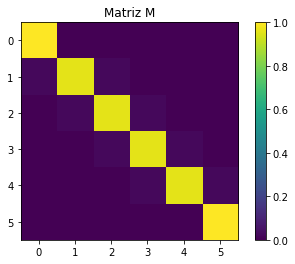

In [7]:
plt.imshow(M)
plt.colorbar()
plt.title('Matriz M')
plt.show()

In [8]:
# Defino el vector de temperaturas "T0", con sus valores iniciales en los extremos.
T0 = np.zeros([N,1])

# Defino el extremo izquierdo.
T0[0] = 100

# Defino el extremo derecho.
T0[-1] = 50

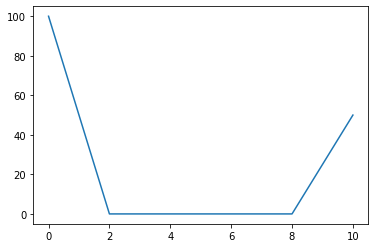

In [9]:
# Grafico las condiciones iniciales.
x = np.linspace(0, L, N)
plt.plot(x, T0)
plt.show()

In [10]:
# Teniendo en cuenta que la matriz "M" no se modifica con el tiempo, ejecuaré un FOR con valores crecientes de tiempo para ir
# actualizando los valores de temperatura en la barra a tiempo "t" y con ellos calcular los posteriores valores de temperatura
# a tiempo "t+dt".

# Asumo que en el tiempo "tfin" el sistema debería estar alcanzando su estado estacionario. EN REALIDAD DEBERÍAMOS VER SI
# PODEMOS OBTENERLO MATEMÁTICAMENTE DE ALGUNA MANERA.
tfin = 1000

# Defino vector "tiempos" separados una cantidad "dt".
tiempos = np.linspace(0,tfin*dt,tfin).astype(int)

# Defino una lista "T", que en cada elemento guarda una lista con valores de T para cada iteración.
T = [T0]

# Para definir dónde cortar, evaluamos el vector "T" en las últimas dos iteraciones, es decir, "[-1]" y "[-2]". Dentro
# de ellas, consideramos los valores en la posición "[1]" (correspondiente a la posición "1" de la barra, es decir, el 
# inmediato posterior al extremo izquierdo de la barra que es "0").

# Defino criterio de corte para entrar al WHILE, pero luego lo calculo como "T[-1][1]-T[-2][1])/dt".
crit_corte = [10]

# El WHILE cortará, además de la otra condición, cuando entre dos valores sucesivos el criterio de corte sea menor a "cut"
cut = 5e-3

while (crit_corte[-1]>cut) and (len(T)<tfin):
    # Calculo una nueva tanda de valores de "T" a lo largo de la barra.
    T.append(M.dot(T[-1]))
    
    # Chequeo que los nuevos valores de "T" calculados sean muy cercanos a los anteriores, a ver si corto la función o no
    crit_corte.append(np.abs(T[-1][1]-T[-2][1])/dt)


Text(0, 0.5, 'Temperatura (°C)')

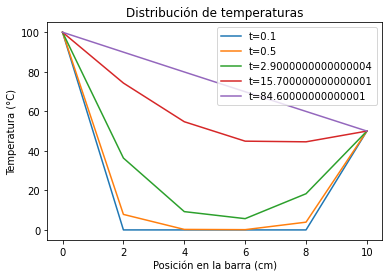

In [11]:
# Gráfico

# Defino vector "t_plot" que servirá para NO graficar la distribución de temperaturas para todos los tiempos desde 0 a 
# tfin almacenados en "tiempos".
cant = 5
t_plot = np.logspace(0,np.log10(len(T)),cant).astype(int)

for i in t_plot:
        plt.plot(x,T[i-1], label=f't={dt*i}')
plt.legend()
plt.title('Distribución de temperaturas')
plt.xlabel('Posición en la barra (cm)')
plt.ylabel('Temperatura (°C)')

C:\WPy64-39100\python-3.9.10.amd64\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0, 0.5, 'Número de iteración')

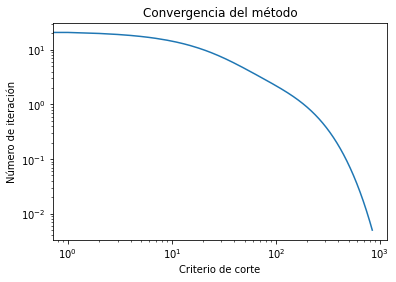

In [12]:
# Grafico los valores almecenados en "crit_corte" en función de la cantidad de iteraciones del método hasta converger.
plt.loglog(crit_corte)
plt.title('Convergencia del método')
plt.xlabel('Criterio de corte')
plt.ylabel('Número de iteración')

### Método implícito

Debe resolverse la ecuación diferencial:

$$
k \frac{\partial^2 T_{(x,t)}}{\partial x^2} = \frac{\partial T_{(x,t)}}{\partial t}
$$

Discretizo el tiempo con $l$ y discretizo el eje x con $k$. Expreso $T(x_i,t_l) = T^l_i$ y discretizo  las derivadas parciales como cocientes incrementales:

$$
\frac{\partial^2 T}{\partial x^2} = \frac{T^{l+1}_{k+1}-2\:T^{l+1}_k+T^{l+1}_{k-1}}{\Delta x^2}
\hspace{1 cm} ; \hspace{1 cm}
\frac{\partial T}{\partial t} = \frac{T^{l+1}_k-T^l_k}{\Delta t}
$$

Reemplazando en la ecuación y definiendo $\lambda = k Δt / (Δx)^2$, se llega a:

$$
-\lambda T^{l+1}_{k-1} + \left(1 + 2 \lambda\right) T^{l+1}_k -\lambda T^{l+1}_{k+1} = T^l_k
$$

Es decir, debo resolver un sistema de ecuaciones donde el término independiente son las temperaturas a un tiempo anterior.

### Método Crank-Nicolson

Definiendo $\lambda = k Δt / (Δx)^2$, se llega a:

$$
-\lambda T^{l+1}_{k-1} + 2 \left(1 + \lambda\right) T^{l+1}_k -\lambda T^{l+1}_{k+1} = \lambda T^{l}_{k-1} + 2 \left(1 - \lambda\right) T^{l}_k + \lambda T^{l}_{k+1}
$$

In [13]:
# Defino lambda.
lam = k*dt/(dx**2)

In [14]:
# Completo matriz "A" del lado izquierdo de la ecuación.
A = np.eye(N)
for k in range(1, N-1):
    A[k,k-1] = -lam
    A[k,k] = 2*(1+lam)
    A[k,k+1] = -lam


In [15]:
# Completo matriz "B" del lado derecho de la ecuación.
B = np.eye(N)
for k in range(1, N-1):
    B[k,k-1] = lam
    B[k,k] = 2*(1-lam)
    B[k,k+1] = lam


In [16]:
# Resuelvo el sistema de ecuaciones.
M = np.linalg.inv(A).dot(B)

In [17]:
# Defino el vector de temperaturas "T0", con sus valores iniciales en los extremos.
T0 = np.zeros([N,1])

# Defino el extremo izquierdo.
T0[0] = 100

# Defino el extremo derecho.
T0[-1] = 50

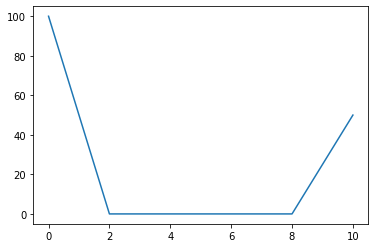

In [18]:
# Grafico las condiciones iniciales.
x = np.linspace(0, L, N)
plt.plot(x, T0)
plt.show()

In [19]:
# Teniendo en cuenta que la matriz "M" no se modifica con el tiempo, ejecuaré un FOR con valores crecientes de tiempo para ir
# actualizando los valores de temperatura en la barra a tiempo "t" y con ellos calcular los posteriores valores de temperatura
# a tiempo "t+dt".

# Asumo que en el tiempo "tfin" el sistema debería estar alcanzando su estado estacionario. EN REALIDAD DEBERÍAMOS VER SI
# PODEMOS OBTENERLO MATEMÁTICAMENTE DE ALGUNA MANERA.
tfin = 1000

# Defino vector "tiempos" separados una cantidad "dt".
tiempos = np.linspace(0,tfin*dt,tfin).astype(int)

# Defino una lista "T", que en cada elemento guarda una lista con valores de T para cada iteración.
T = [T0]

# Para definir dónde cortar, evaluamos el vector "T" en las últimas dos iteraciones, es decir, "[-1]" y "[-2]". Dentro
# de ellas, consideramos los valores en la posición "[1]" (correspondiente a la posición "1" de la barra, es decir, el 
# inmediato posterior al extremo izquierdo de la barra que es "0").

# Defino criterio de corte para entrar al WHILE, pero luego lo calculo como "T[-1][1]-T[-2][1])/dt".
crit_corte = [10]

# El WHILE cortará, además de la otra condición, cuando entre dos valores sucesivos el criterio de corte sea menor a "cut"
cut = 5e-3

while (crit_corte[-1]>cut) and (len(T)<tfin):
    # Calculo una nueva tanda de valores de "T" a lo largo de la barra.
    T.append(M.dot(T[-1]))
    
    # Chequeo que los nuevos valores de "T" calculados sean muy cercanos a los anteriores, a ver si corto la función o no
    crit_corte.append(np.abs(T[-1][1]-T[-2][1])/dt)

Text(0, 0.5, 'Temperatura (°C)')

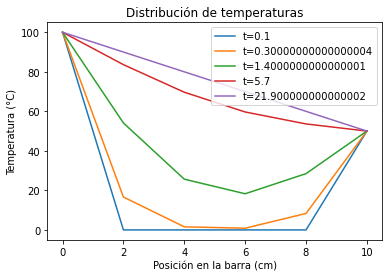

In [20]:
# Gráfico

# Defino vector "t_plot" que servirá para NO graficar la distribución de temperaturas para todos los tiempos desde 0 a 
# tfin almacenados en "tiempos".
cant = 5
t_plot = np.logspace(0,np.log10(len(T)),cant).astype(int)

for i in t_plot:
        plt.plot(x,T[i-1], label=f't={dt*i}')
plt.legend()
plt.title('Distribución de temperaturas')
plt.xlabel('Posición en la barra (cm)')
plt.ylabel('Temperatura (°C)')

C:\WPy64-39100\python-3.9.10.amd64\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0, 0.5, 'Número de iteración')

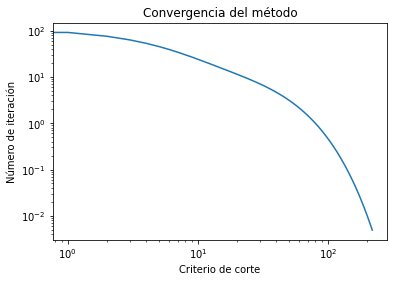

In [21]:
# Grafico los valores almecenados en "crit_corte" en función de la cantidad de iteraciones del método hasta converger.
plt.loglog(crit_corte)
plt.title('Convergencia del método')
plt.xlabel('Criterio de corte')
plt.ylabel('Número de iteración')